In [12]:
jupyterlab_url = "http://localhost:8888/lab?token=test-token"
default_result_path = None
close_on_fail = False
transition_timeout = 10000
default_delay = 200

In [13]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp6e8c70wh'

# nbsearch E2E Test - Notebook Search

- Test data to prepare: Test notebooks should be indexed in Solr

In [14]:
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path, delay=default_delay)

('20251021-131735',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpw_k5yie_')

## Open JupyterLab and wait for it to load

Start epoch: 1761020255.9962208 seconds


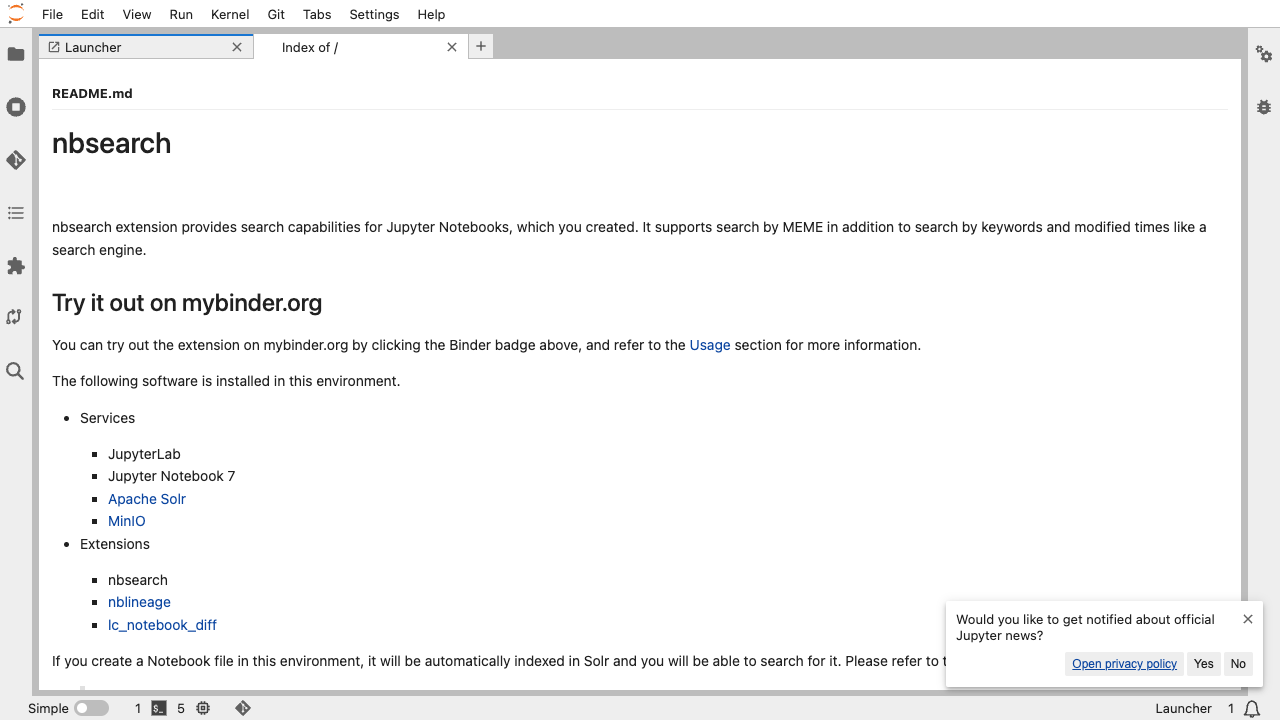

In [15]:
lab_page = None

async def _step(page):
    await page.goto(jupyterlab_url)

    # Wait for JupyterLab to load
    await expect(page.locator('#jp-main-dock-panel')).to_be_visible(timeout=transition_timeout)

    await expect(page.locator('//*[@data-icon="nbsearch::notebooksearch"]')).to_be_visible(timeout=transition_timeout)

    global lab_page
    lab_page = page

await run_pw(_step)

## Open NBSearch tab

Start epoch: 1761020258.6554189 seconds


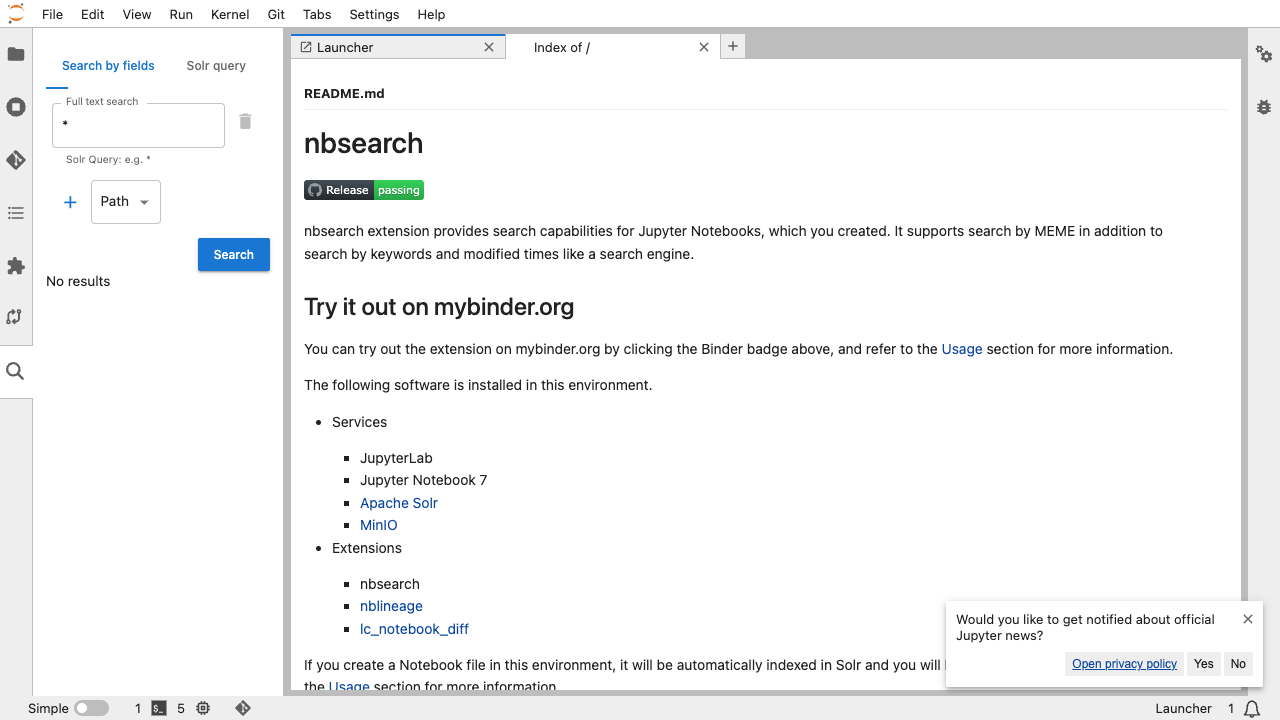

In [16]:
async def _step(page):
    # Click on the NBSearch icon in the left sidebar
    await page.locator('//*[@data-icon="nbsearch::notebooksearch"]').click()

    # Wait for the NBSearch panel to be visible
    await expect(page.locator('.nbsearch-search-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Perform a simple search

Start epoch: 1761020259.0255811 seconds


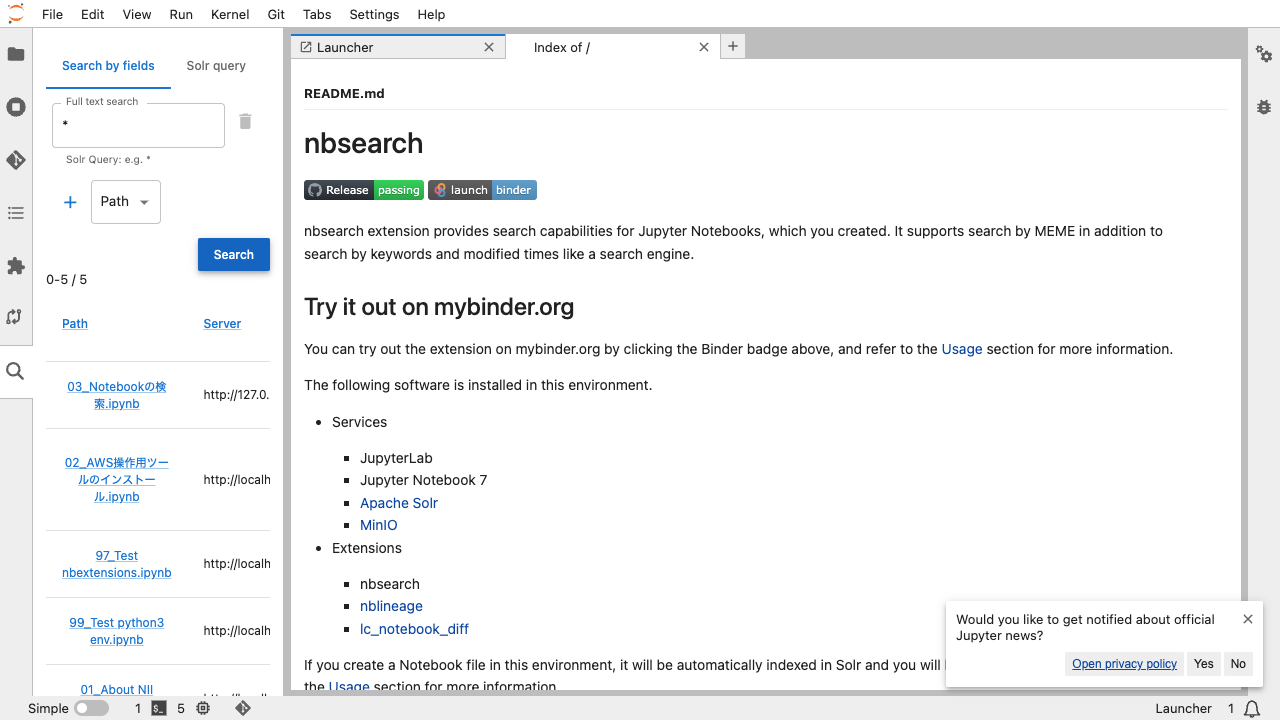

In [17]:
search_query = "*"

async def _step(page):
    # Find the search input field
    search_input = page.locator('.nbsearch-search-root input[type="text"]').first
    await search_input.fill(search_query)

    # Click the search button
    await page.locator('.nbsearch-search-execute button').click()

    # Wait for search results to appear
    await expect(page.locator('.MuiTableBody-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Input the search query and execute search

Start epoch: 1761020342.8194041 seconds
Number of search results: 5
Number of search results after new query: 2


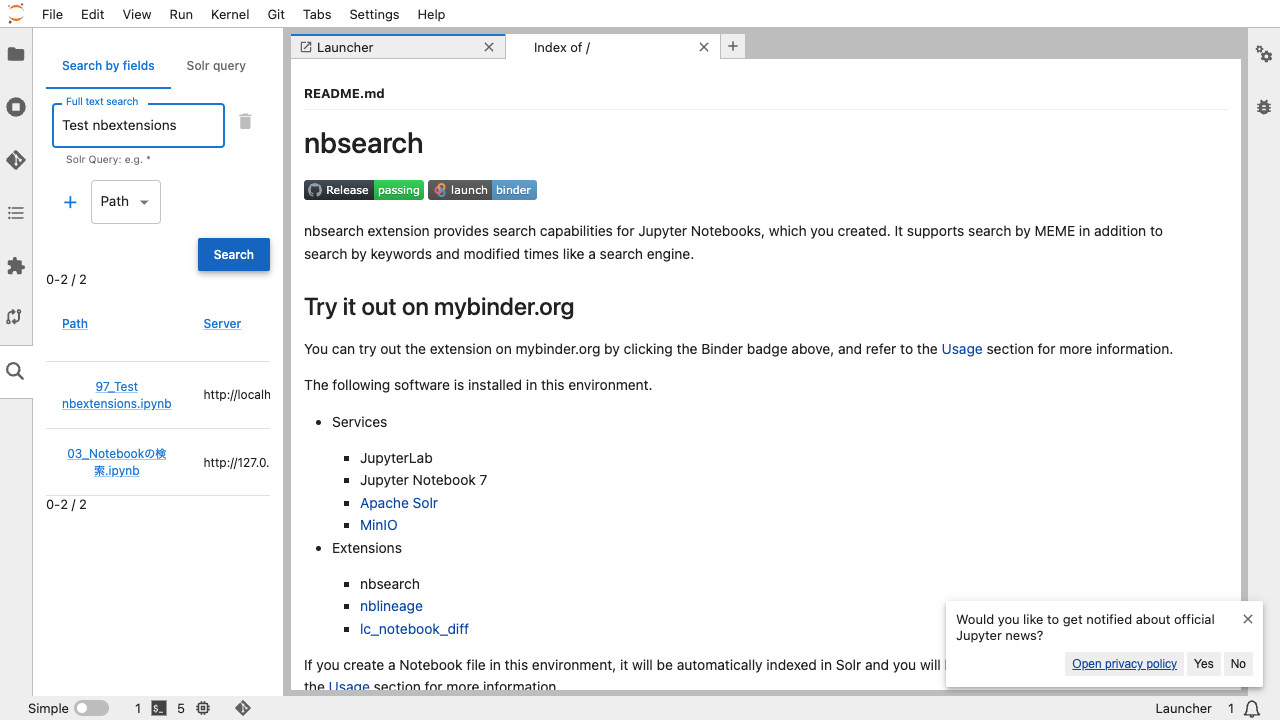

In [19]:
async def _step(page):
    # Count the number of search results
    results = page.locator('.MuiTableBody-root tr')
    count_before = await results.count()
    print(f"Number of search results: {count_before}")

    # Input a specific search query and press Enter to execute search
    await page.locator('.nbsearch-query-fields-value .MuiOutlinedInput-input').fill('Test nbextensions')
    await page.locator('.nbsearch-query-fields-value .MuiOutlinedInput-input').press('Enter')

    # Wait for search results to update
    await expect(page.locator('.MuiTableBody-root tr')).not_to_have_count(count_before, timeout=transition_timeout)
    count_after = await results.count()
    print(f"Number of search results after new query: {count_after}")
    assert count_after < count_before, "Search results did not update after new query"

await run_pw(_step)

## Click the first result row to view notebook content

Start epoch: 1761020361.404877 seconds
Number of open tabs before clicking result: 0


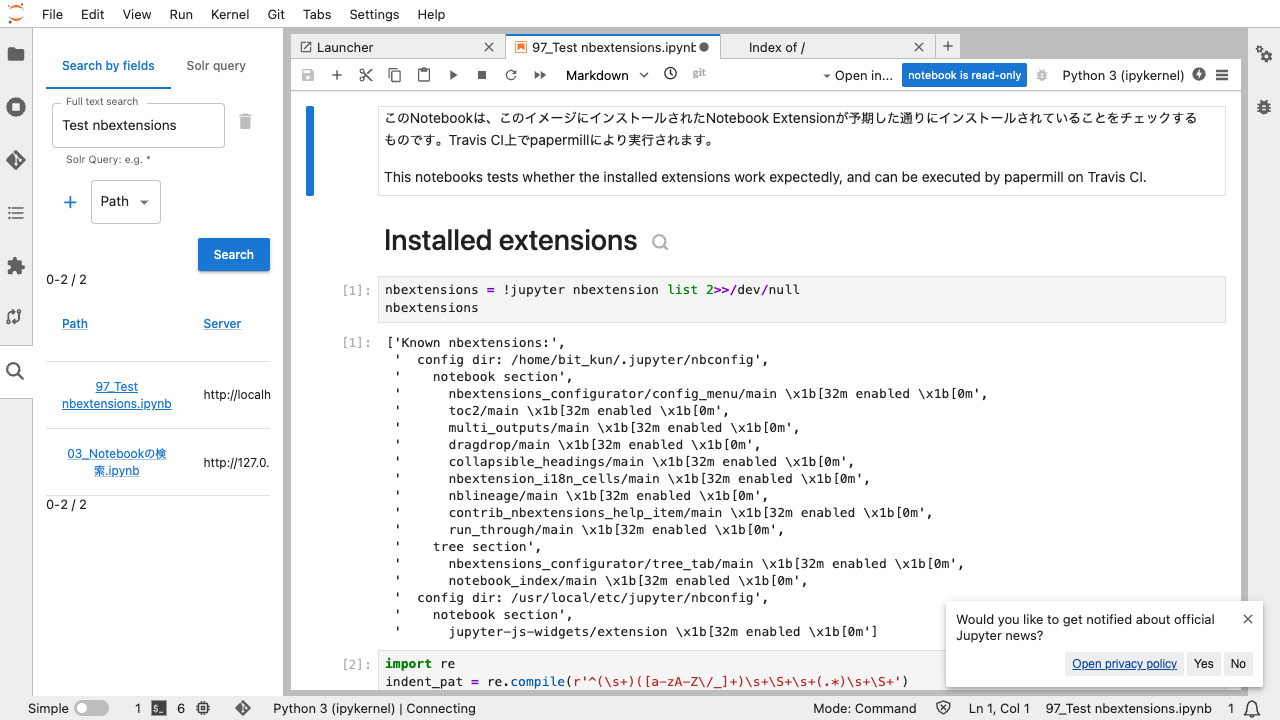

In [21]:
async def _step(page):
    tab_count = await page.locator('[data-type="document-title"]').count()
    print(f"Number of open tabs before clicking result: {tab_count}")

    # Click on the first result row
    first_row = page.locator('.nbsearch-results-root .MuiTableBody-root tr').first
    await first_row.locator('button').click()

    # Wait for the notebook tab to open
    await expect(page.locator('[data-type="document-title"]')).to_have_count(tab_count + 1, timeout=transition_timeout)

await run_pw(_step)

## Clean up

In [ ]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcsn60amn/video-1.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcsn60amn/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpf613lr47/videos/0e2a2e8b67990c7519a7a4ef54572e6f.webm'


In [ ]:
!rm -fr {work_dir}